# Visualization of Apparent Fishing Effort as Tracks for a Single Day

Data source: [link](https://globalfishingwatch.org/data-download/datasets/public-fishing-effort)

In [1]:
import cartopy

import pandas as pd
import matplotlib.pyplot as plt

from conversion import points_to_smooth_lines

In [2]:
df = pd.read_csv('mmsi-daily-csvs-10-v3-2015/mmsi-daily-csvs-10-v3-2015-02-03.csv')
df = df[df.cell_ll_lat > 60]

In [3]:
tracks = points_to_smooth_lines(df)

In [4]:
tracks

,start_date,end_date,hours,fishing_hours,n_pixels,geometry
mmsi,,,,,,
57173720,2015-02-03,2015-02-03,20.2135,0.0000,2,"LINESTRING (15 69, 15 68.9)"
219138000,2015-02-03,2015-02-03,1.0340,0.0000,4,"LINESTRING (0.5 60.1, 0.6 60.1, 0.6 60.2, 0.7 ..."
219257000,2015-02-03,2015-02-03,23.3592,23.3592,5,"LINESTRING (-30.8 65.8, -30.7 65.9, -30.8 65.9..."
219765000,2015-02-03,2015-02-03,20.2832,1.5427,3,"LINESTRING (2.9 60.6, 3.1 60.4, 3.2 60.2)"
225436000,2015-02-03,2015-02-03,21.7747,21.7747,7,"LINESTRING (39.8 75.5, 39.9 75.5, 40 75.5, 40...."
...,...,...,...,...,...,...
331428000,2015-02-03,2015-02-03,21.8140,21.8140,8,"LINESTRING (-55.7 64.2, -55.6 64.1, -55.6 64.2..."
331478000,2015-02-03,2015-02-03,24.0017,24.0017,10,"LINESTRING (-10.8 65.3, -10.8 65.4, -10.9 65.4..."
331480000,2015-02-03,2015-02-03,23.3356,23.3356,4,"LINESTRING (-37.1 64.4, -37.2 64.4, -37.3 64.4..."


In [23]:
tracks.n_pixels.argsort()[::-1][:10].tolist()

[218, 699, 714, 370, 93, 298, 727, 661, 159, 270]

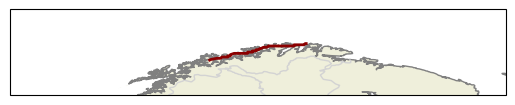

In [66]:
index = 370

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': cartopy.crs.PlateCarree()})
tracks.iloc[[index]].plot(ax=ax, linewidth=2, color='darkred')

# Add features
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='grey')
ax.add_feature(cartopy.feature.BORDERS, edgecolor='lightgrey')
ax.add_feature(cartopy.feature.LAND);

# Zoom out a bit; increase it to zoom out more
zoom_out_level = 2
xmin, ymin, xmax, ymax = tracks.iloc[[index]].total_bounds

ax.set_ylim(
    ymin - zoom_out_level * (ymax - ymin),
    ymax + zoom_out_level * (ymax - ymin),
)
ax.set_xlim(
    xmin - zoom_out_level * (xmax - xmin),
    xmax + zoom_out_level * (xmax - xmin),
);